In [1]:
!pip install alpha_vantage

In [0]:
MY_API_KEY = 'J4PS1W9LI8IL0E97'
ENDDATE = '2019-10-01'

from alpha_vantage.timeseries import TimeSeries
from datetime import datetime
from datetime import timedelta

In [0]:
ONEYEARDAYS = 252
FREQ = 90

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')
import os
import scipy
from scipy import optimize
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

In [0]:
ts = TimeSeries(key='MY_API_KEY', output_format='pandas')
def get_daily_close(symbol):
    full_data, meta_data = ts.get_daily(symbol = symbol, outputsize='full')
    series_index = pd.Series(full_data.index)
    full_data.index = series_index.apply(lambda t: np.datetime64(t).astype(datetime).date()).values
    assert '4. close' in full_data.columns
    close = full_data['4. close']
    close.index.name = 'Date'
    close.name = symbol
    assert close.index[0] < datetime(2006,1,3).date()
    return close[datetime(2006,1,3).date() : ]

In [0]:
SPY = get_daily_close('SPY')
TLT = get_daily_close('TLT')
GLD = get_daily_close('GLD')
assert len(SPY) == len(TLT)
assert len(TLT) == len(GLD)
m1 = pd.merge(left = SPY, left_index = True, right = TLT, right_index=True, how = 'inner')
dataall = pd.merge(left = m1, left_index = True, right = GLD, right_index=True, how = 'inner')

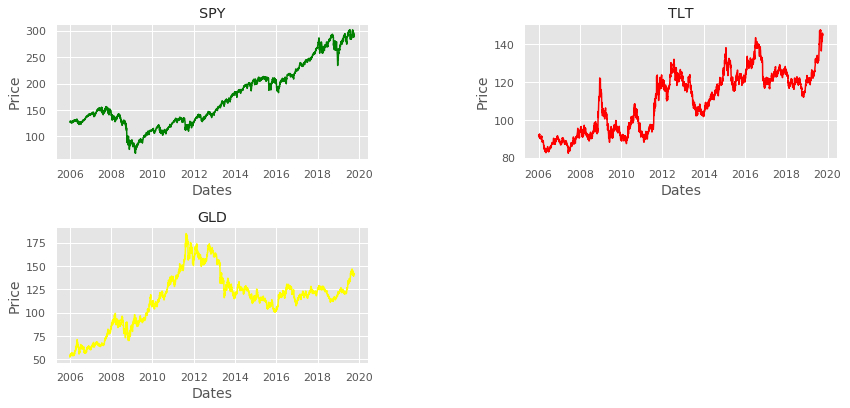

In [30]:
fig1 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots
plt.subplot(321)
ax = plt.gca()
ax.plot(SPY, color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('SPY')

plt.subplot(322)
ax = plt.gca()
ax.plot(TLT, color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('TLT')

plt.subplot(323)
ax = plt.gca()
ax.plot(GLD, color ='yellow')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('GLD')

plt.show();


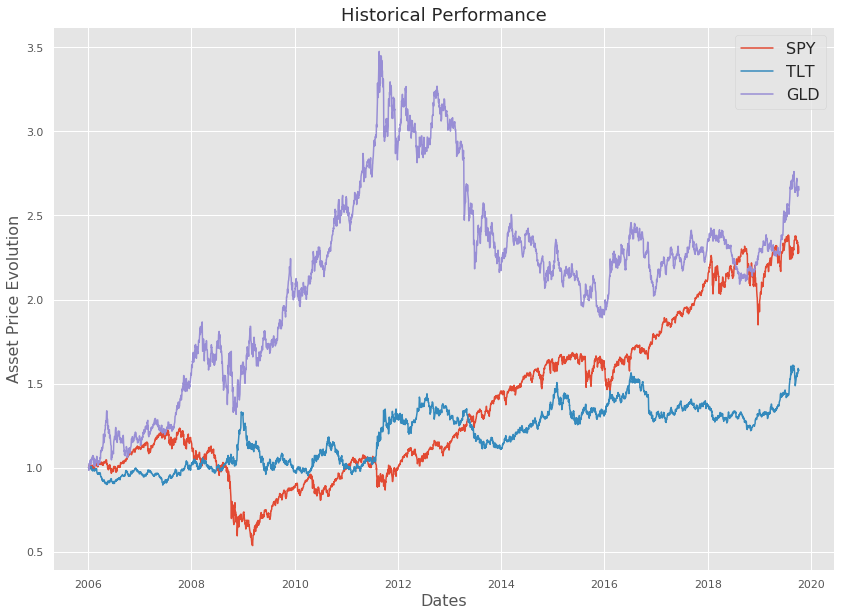

In [33]:
normalized_series = (dataall/dataall.iloc[0])
fig2 =plt.figure(figsize=(14,10))
plt.plot(normalized_series)
title_text_obj = plt.title("Historical Performance", fontsize = 18)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
plt.legend(('SPY','TLT','GLD'),fontsize = 16,loc = 'best')
plt.show()

In [0]:
returns = dataall.pct_change()
returns.dropna(inplace = True)
returns_mul_factor = returns + 1
## Calculating covariance matrix
cov_series = returns.rolling(window = FREQ).cov() * ONEYEARDAYS

In [0]:
spy_ret = returns['SPY']
tlt_ret = returns['TLT']
gld_ret = returns['GLD']
day_counts = len(spy_ret)
calendar = returns.index.values

In [37]:
stats = pd.DataFrame()
stats['Annualized Returns(%)'] = returns.mean() * ONEYEARDAYS *100
stats['Annualized Volatility(%)'] = returns.std() * np.sqrt(ONEYEARDAYS)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']
print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
SPY,7.78328,18.9385,0.410977
TLT,4.29915,13.8823,0.309685
GLD,8.88466,18.615,0.477286


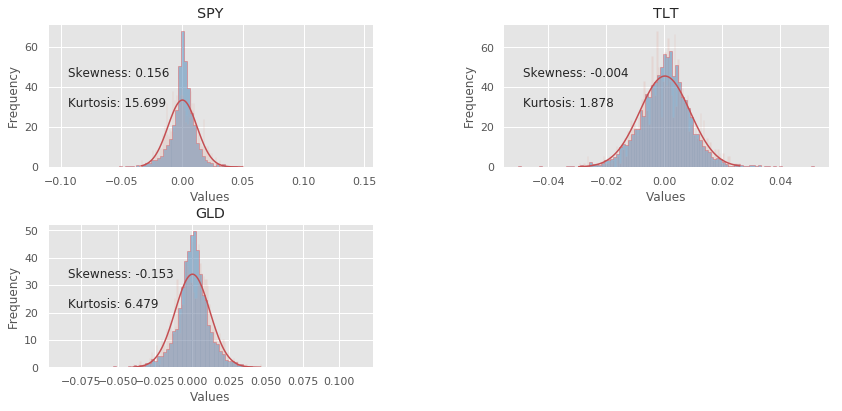

In [42]:
binsnumber = 100

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots

# asset_plot_location = {'SPY':321, 'TLT': 322 , 'GLD': 323}
# asset_list = ['SPY', 'TLT', 'GLD']

# ####
# def return_distribution_plot(name):
#     """
#     Plot function
#     """
#     fig3, ax = plt.subplots(figsize=(14,10))
#     plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
#     plt.subplot(asset_plot_location.get(name))
#     ax = plt.gca()

#     ax.hist(dataall_returns[name], bins=binsnumber, color='steelblue', density = True,
#            alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

#     sigma, mu = dataall_returns[name].std(),dataall_returns[name].mean() # mean and standard deviation
#     s = np.random.normal(mu, sigma, 1000)
#     count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
#     ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

#     ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns[name].skew(),2),round(dataall_returns[name].kurtosis(),2)),
#                  xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

#     ax.set_xlabel('Values')
#     ax.set_ylabel('Frequency')
#     ax.set_title(name)
#     plt.show()
    
#####################
plt.subplot(321)
ax = plt.gca()

ax.hist(returns['SPY'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns['SPY'].std(),returns['SPY'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns['SPY'].skew(),3),
                                                  round(returns['SPY'].kurtosis(),3)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('SPY')


#####################
plt.subplot(322)
ax = plt.gca()

ax.hist(returns['TLT'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns['TLT'].std(),returns['TLT'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns['TLT'].skew(),3),
                                                  round(returns['TLT'].kurtosis(),3)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('TLT')


#####################
plt.subplot(323)
ax = plt.gca()

ax.hist(returns['GLD'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = returns['GLD'].std(),returns['GLD'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(returns['GLD'].skew(),3),
                                                  round(returns['GLD'].kurtosis(),3)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('GLD')

plt.show();
# fig3.savefig('histos.png',dpi=fig3.dpi)

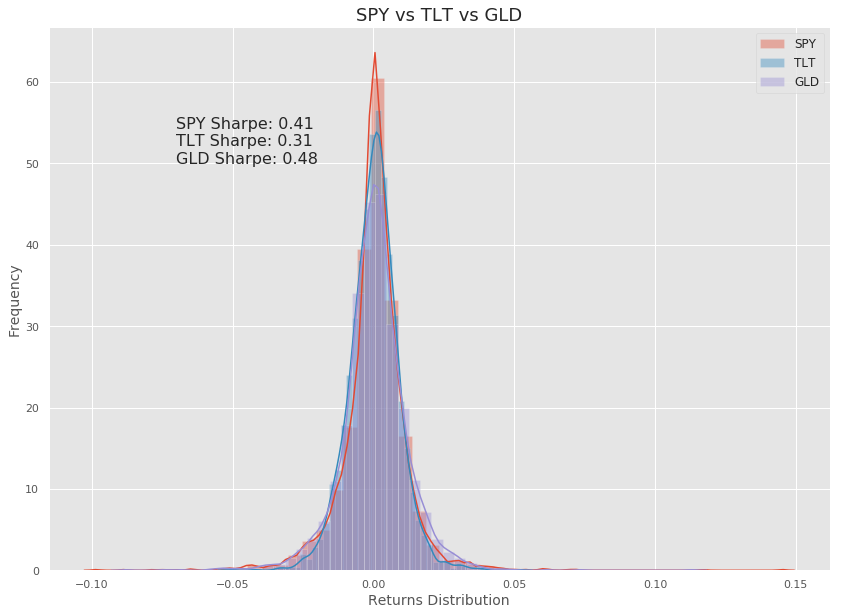

In [45]:
fig4 = plt.figure(figsize=(14,10))
sns.distplot(returns['SPY'])
sns.distplot(returns['TLT'])
sns.distplot(returns['GLD'])
plt.legend(('SPY','TLT','GLD'),fontsize = 12)

# anotate an important value
plt.annotate(' \nSPY Sharpe: {}\nTLT Sharpe: {} \nGLD Sharpe: {}'.format(round(stats.loc['SPY','Sharpe Ratio'],2),round(stats.loc['TLT','Sharpe Ratio'],2), round(stats.loc['GLD','Sharpe Ratio'],2)),
             xy=(-.01,40),xycoords = 'data',xytext =(-.07, 50),fontsize=16)
plt.title('SPY vs TLT vs GLD',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();

In [0]:
all_cov = []
for i in range(1,day_counts//FREQ + 1):
    ## Indexing the covariance matrix, in pair of (date, covariance matrix)
    all_cov.append( (cov_series.index[(i*FREQ-1)*3][0] ,cov_series.iloc[(i*FREQ-1)*3 : i*FREQ*3]))

In [0]:
def equal_risk(weight, cov):
    diff1 = weight[0]**2 * cov.iloc[0, 0] + \
        weight[0]*weight[1] * cov.iloc[1,0] + \
        weight[0]*(1 - weight[0] - weight[1]) * cov.iloc[2,0]
        
    diff2 = weight[0]*weight[1] * cov.iloc[0,1] + \
        weight[1]**2 * cov.iloc[1,1] + \
        weight[1]*(1 - weight[0] - weight[1]) * cov.iloc[2,1]
        
    diff3 = weight[0]*(1 - weight[0] - weight[1]) * cov.iloc[0,2] + \
        weight[1]*(1 - weight[0] - weight[1]) * cov.iloc[1,2] + \
        (1 - weight[0] - weight[1])**2 * cov.iloc[2,2]
        
    return np.square(diff1 - diff2)+ np.square(diff1 - diff3) + np.square(diff2 - diff3)

def weight_calculation(cov_df):
    ans = minimize(equal_risk, [0.0, 0.0], (cov_df), method='L-BFGS-B',  bounds=((0,1), (0,1)))
    result = []
    result.extend(list(ans.x))
    result.append(1- ans.x.sum())
    return np.array(result)

In [0]:
rebalance_pair = {}
for i in range(day_counts//FREQ ):
    res = weight_calculation(all_cov[i][1])
    rebalance_pair.update({all_cov[i][0] : res})
rebalance_pair = pd.Series(rebalance_pair)
rebalance_date = rebalance_pair.index.values
rebalance_weight = rebalance_pair.values

In [0]:
new_calendar = calendar[calendar > rebalance_date[0]]

In [0]:
current_asset = rebalance_weight[0] * 1000
equal_risk_result = {rebalance_date[0] : 1000}

for date in new_calendar:
 
    if date not in rebalance_date:
        current_asset = current_asset * (returns_mul_factor.loc[date].values)
        current_level = current_asset.sum()
        equal_risk_result.update({date: current_level})
    else:
        current_asset = current_asset * (returns_mul_factor.loc[date].values)
        current_level = current_asset.sum()
        current_asset = rebalance_pair[date] * current_level
        equal_risk_result.update({date: current_level})
        
equal_risk_result = pd.Series(equal_risk_result)

In [0]:
equal_capital_weight = np.array([1,1,1])/3
current_asset = equal_capital_weight * 1000
equal_capital_result = {rebalance_date[0] : 1000}

for date in new_calendar:
 
    if date not in rebalance_date:
        current_asset = current_asset * (returns_mul_factor.loc[date].values)
        current_level = current_asset.sum()
        equal_capital_result.update({date: current_level})
    else:
        current_asset = current_asset * (returns_mul_factor.loc[date].values)
        current_level = current_asset.sum()
        current_asset = equal_capital_weight * current_level
        equal_capital_result.update({date: current_level})
        
equal_capital_result = pd.Series(equal_capital_result)

In [0]:
from matplotlib import patheffects
fig6 =plt.figure(figsize=(14,10))
ax = plt.gca()
ax.plot([equal_capital_result, equal_risk_result])

title_text_obj = plt.title("Historical Performance Including Custom Portfolios Normalized", fontsize = 18,
                          verticalalignment = 'bottom')

pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
ax.legend(('Equal Capital', 'Equal Risk'),fontsize = 12)
ax.annotate('EM Portfolio provides \nhigher risk adjusted return',('2018-04-30',1.4),xycoords = 'data',xytext =('2013-08-30',1.4),arrowprops =dict(arrowstyle ='->'),fontsize=14)
plt.show()
# fig6.savefig('portfolioscomp.png',dpi=fig6.dpi)